**Autor:** Andrej Gajdoš  <br>
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br>
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
***
**<font size=6 color=green> LCO: Riešenie úloh LP pomocou CVXPY </font>**  

_CVXPY_ je knižnica napísaná v Pythone a slúži na riešenie problémov konvexnej optimalizácie (patria tu aj úlohy LP). Umožňuje nám vyjadriť (zapísať do kódu) optimalizačné úlohy prirodzeným spôsobom, veľmi podobne ako je to v jazyku matematiky. Ináč povedané, matematická formulácia optimalizačnej úlohy a jej prepis do jazyka Python pomocou CVXPY vyzerajú takmer rovnako.  Ukážeme si to ďalej na príkladoch. Navyše vďaka pravidlám [DCP](https://web.stanford.edu/~boyd/papers/disc_cvx_prog.html) ([Disciplined Convex Programming](http://cvxr.com/dcp/)) je softvér schopný overiť, či zadaná úloha naozaj patrí do triedy konvexných optimalizačných problémov. Solvery implementovné v CVXPY využívajú na riešenie optimalizačných úloh tzv. metódy vnútorného bodu. Viac o týchto metódach je možné sa dozvedieť napr. v nasledujúcich odkazoch: [odkaz 1](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf), [odkaz 2](https://optimization.mccormick.northwestern.edu/index.php/Interior-point_method_for_LP), [odkaz 3](https://www.tu-ilmenau.de/fileadmin/media/simulation/Lehre/Vorlesungsskripte/Lecture_materials_Abebe/IPM_Slides.pdf).

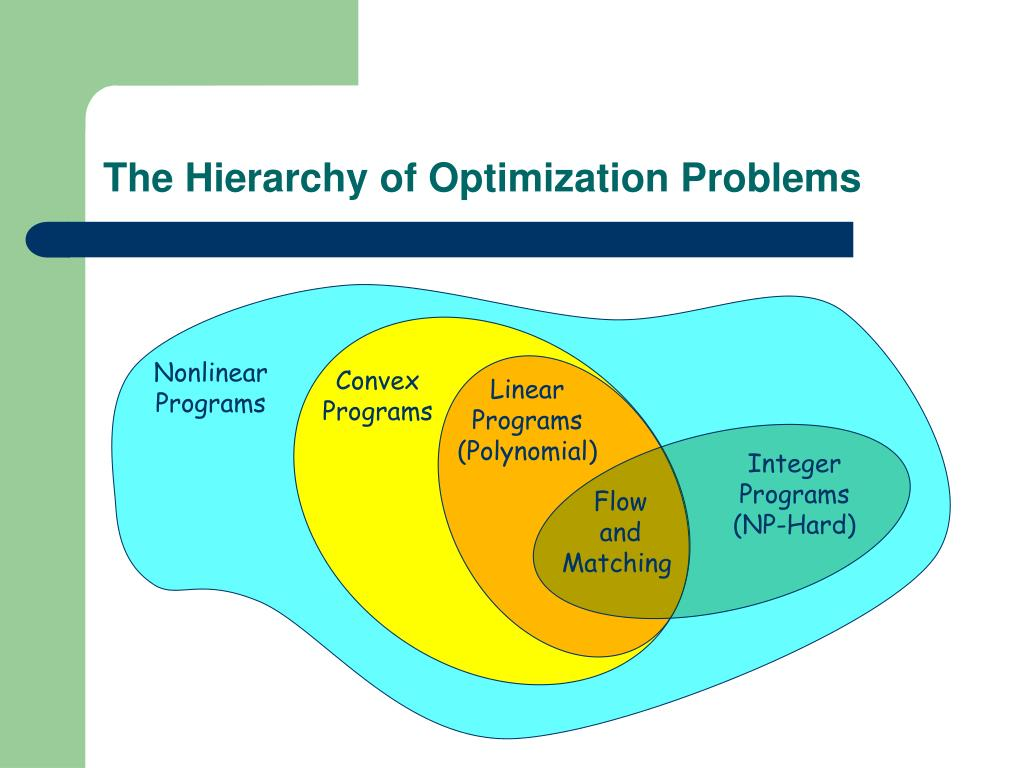

$$\text{Zdroj: Nathaniel Waller (https://www.slideserve.com/nathaniel-waller/optimization-problems)}$$

Najprv importujeme všetky funkcie z Pythonovskej knižnice _CVXPY_, aby sme ich mohli ďalej používať pri riešení optimalizačných úloh. Taktiež importujeme knižnicu _NumPy_ pre prácu s poliami resp. maticami.

In [ ]:
from cvxpy import *
import numpy as np

---

### Príklad 1

Vyriešte úlohu LP:

\begin{align}
3x_1 - 5x_2 & \rightarrow \mathrm{min} \\
-x_1 -  x_2 & \le 6 \\
 x_1 + 2x_2 & \le 14 \\
        x_{1-2} & \ge 0.
\end{align}

<ins> Riešenie: </ins>


V prvom kroku definujeme (dvojrozmerný) vektor premenných $x=(x_1,x_2)'$ pomocou funkcie `Variable()` s argumentom $2$, ktorý vyjadruje dimenziu (počet zložiek) vektora.

In [ ]:
x = Variable(2)

Ďalej definujeme účelovú funkciu $z=3x_1-5x_2$. V Pythone sa indexuje od $0$ !

In [ ]:
z = 3*x[0] - 5*x[1]

Účelovú funkciu chceme minimaizovať t.j. $3x_1 - 5x_2 \rightarrow \mathrm{min}$. Na to slúži v Pythone funkcia `Minimize()`.

In [ ]:
objective = Minimize(z)

V ďalšom kroku zadefinujeme ohraničenia (zoznam ohraničení):

\begin{align}
-x_1 -  x_2 & \le 6 \\
 x_1 + 2x_2 & \le 14 \\
        x_{1-2} & \ge 0.
\end{align}

In [ ]:
constraints = [-x[0]-x[1]<=6, x[0]+2*x[1]<=14, x>=0]

Následne pomocou funkcie `Problem()` definujeme optimalizčný problém ako objekt v Pythone - účelová funkcia plus ohraničenia.

In [ ]:
prob = Problem(objective, constraints)

V poslednej fáze zavoláme funkciu `solve()` a necháme optimalizačnú úlohu vyriešiť predvoleným solverom.

In [ ]:
solution = prob.solve()

Na záver vypíšeme optimálne hodnoty premenných pomocou `value` a optimálnu hodnotu účelovej funkcie.

In [ ]:
print('optimálne hodnoty premenných sú ', x.value)
print('optimálna hodnota účelovej funkcie je ', solution)

optimálne hodnoty premenných sú  [8.25803922e-11 7.00000000e+00]
optimálna hodnota účelovej funkcie je  -34.99999999817711


In [ ]:
# meranie vypoctoveho casu
print("Solve time:", prob.solver_stats.solve_time)

Solve time: 2.8067e-05


Pri riešeni uvedenej úlohy bolo možné použiť aj vektorový resp. maticový zápis úlohy.

Zadefinujeme najprv stĺpcový vektor premenných rozmeru $2\times1$ a pomenujeme ho $\mathbf{\mathit{x}}$.

In [ ]:
x = Variable(shape = (2,1), name = 'x')

Vektor koeficientov účelovej funkcie označíme $\mathbf{\mathit{c}}=(3,-5)'$. Potom zrejme $z=\mathbf{\mathit{c}}\cdot\mathbf{\mathit{x}}=3x_1-5x_2$. Toto násobenie prevedieme v Pythone pomocou funkcie `matmul()` - matrix multiplication.

In [ ]:
c = np.array([3,-5]) # np iba je iba skratka pre kniznicu NumPy, tak sme ju importovali v uvode
z = matmul(c, x)

Účelovú funkciu $z$ chceme minimalizovať.

In [ ]:
objective = Minimize(z)

Ďalej definujeme maticu ohraničení $\mathbf{A}$ (po riadkoch, ako zoznam zoznamov) a tiež vektor pravých strán $\mathbf{\mathit{b}}$, pričom

$\mathbf{A}=
\begin{pmatrix}
-1 & -1\\
1 & 2
\end{pmatrix},
\qquad
\mathbf{\mathit{b}}=
\begin{pmatrix}
6 \\
14
\end{pmatrix}.$

In [ ]:
A = np.array([[-1,-1],[1,2]])
b = np.array([[6,14]]).T # transpozicia vektora b na stlpcovy lebo najprv sa vytvori ako riadkovy vektor

Teraz môžeme definovať ohraničenia.

In [ ]:
b

array([[ 6],
       [14]])

In [ ]:
constraints = [matmul(A,x)<=b, x>=0]

Definujeme optimalizačný problém ako účelová funkcia plus ohraničenia.

In [ ]:
prob = Problem(objective, constraints)

Úlohu vyriešime.

In [ ]:
solution = prob.solve()

In [ ]:
# vypiseme riesenie
print('optimálne hodnoty premenných sú ', x.value)
print('optimálna hodnota účelovej funkcie je ', solution)

optimálne hodnoty premenných sú  [[8.25803922e-11]
 [7.00000000e+00]]
optimálna hodnota účelovej funkcie je  -34.99999999817711


In [ ]:
# meranie vypoctoveho casu
print("Solve time:", prob.solver_stats.solve_time)

Solve time: 2.8986e-05


---

---

### Príklad 2

Vyriešte úlohu LP:

\begin{align}
x_1 & \qquad - & x_2  & \qquad + & \qquad 3x_3 & \qquad - & 2x_4      \qquad & \rightarrow \qquad & \mathrm{min} \\
x_1 & \qquad + & x_2  & \qquad   & \qquad      & \qquad + & x_4       \qquad & = \qquad & 1 \\
    & \qquad   & x_2  & \qquad + & \qquad x_3  & \qquad - & x_4       \qquad & = \qquad & 2 \\
x_1 & \qquad + & 2x_2 & \qquad + & \qquad x_3  & \qquad   &           \qquad & = \qquad & 2 \\
    & \qquad   &      & \qquad   &  \qquad     & \qquad   & x_{1-4}   \qquad & \ge \qquad & 0.
\end{align}

<ins> Riešenie: </ins>

In [ ]:
# vytvorime premenne a vektory/matice koeficientov pre zadanu ulohu LP
x = Variable(shape = (4,1))
c = np.array([1,-1,3,-2])
A = np.array([[1,1,0,1],[0,1,1,-1],[1,2,1,0]])
b = np.array([[1,2,2]]).T

In [ ]:
# definujeme ucelovu funkciu
z = matmul(c, x)
objectve = Minimize(z)
# definujeme ohranicenia
constraints = [matmul(A,x)<=b, x>=0]

In [ ]:
# definujeme optimalizacny problem, vyriesime ho a vypiseme riesenie
prob = Problem(objective, constraints)
solution = prob.solve()
print('optimálne hodnoty premenných sú ', x.value)
print('optimálna hodnota účelovej funkcie je ', solution)

optimálne hodnoty premenných sú  None
optimálna hodnota účelovej funkcie je  -inf


---

Ďalšie príklady použitia _CVXPY_ ako aj podrobnejší manuál k jednotlivým súčastiam _CVXPY_ je možné nájsť napr. na oficálnej [stránke](https://www.cvxpy.org/).

---

### Príklad 3 (D.Ú.)

Vyriešte úlohu LP:

\begin{align}
4x_1 + 2x_2 & \rightarrow \mathrm{min} \\
4x_1 - 3x_2 & \le 12 \\
-3x_1 + 6x_2 & \le 10 \\
        x_{1} & \ge 1 \\
      0 \le x_2 & \le 5
\end{align}

<ins> Riešenie: </ins>

---

***
<a id=zdroje></a>
# <font color=brown> Použité zdroje</font>

* Boyd S., Vandenberghe L. (2009). Convex Optimization. Cambridge University Press.


* Cechlárová K., Semanišin G. (1999). Lineárna optimalizácia. PF UPJŠ.


* Cornuéjols G., Peña J., Tütüncü R. (2018). Optimization Methods in Finance. Cambridge University Press.


* Diamond S., Boyd S. (2016). CVXPY: A Python-Embedded Modeling Language for Convex Optimization. J Mach Learn Res 17(83):1-5.


* Grant M., Boyd S., Ye Y. (2006). Global Optimization: From Theory to Implementation. Springer.


* [Oficiálna stránka](https://www.cvxpy.org/) CVXPY.

